In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf

AUTOTUNE = tf.data.experimental.AUTOTUNE

import IPython.display as display
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

tf.__version__


'2.0.0'

In [3]:
import pathlib
data_dir = tf.keras.utils.get_file(origin='https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz',
                                         fname='flower_photos', untar=True)
data_dir = pathlib.Path(data_dir)


228818944/228813984 [==============================] - 18s 0us/step


In [4]:
image_count = len(list(data_dir.glob('*/*.jpg')))
image_count


3670

In [5]:
CLASS_NAMES = np.array([item.name for item in data_dir.glob('*') if item.name != "LICENSE.txt"])
CLASS_NAMES


array(['daisy', 'roses', 'dandelion', 'sunflowers', 'tulips'],
      dtype='<U10')

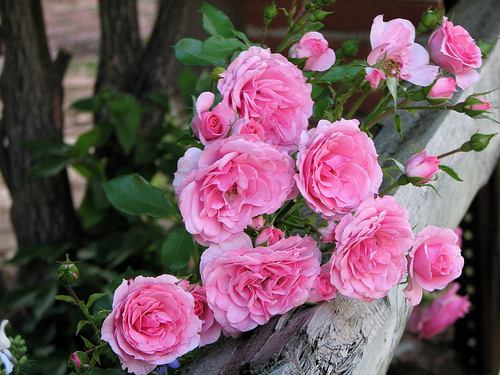

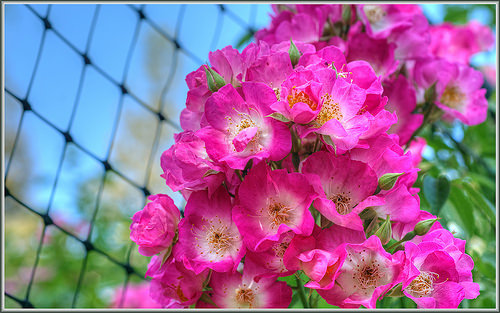

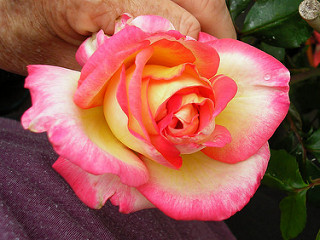

In [6]:
roses = list(data_dir.glob('roses/*'))

for image_path in roses[:3]:
    display.display(Image.open(str(image_path)))


Found 3670 images belonging to 5 classes.


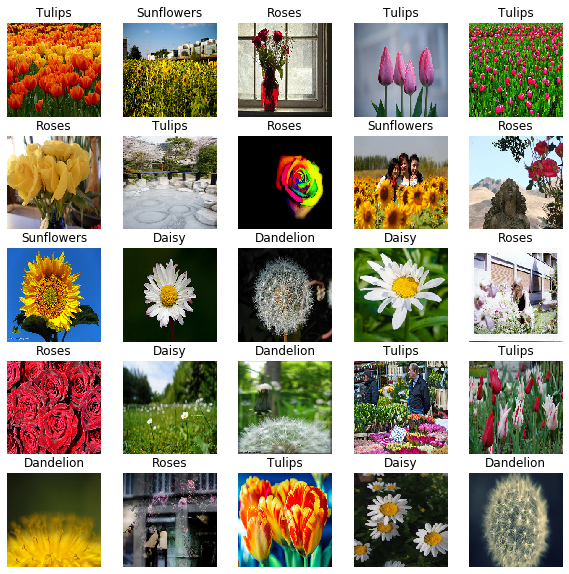

In [11]:
# The 1./255 is to convert from uint8 to float32 in range [0,1].
image_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

BATCH_SIZE = 32
IMG_HEIGHT = 224
IMG_WIDTH = 224
STEPS_PER_EPOCH = np.ceil(image_count/BATCH_SIZE)

train_data_gen = image_generator.flow_from_directory(directory=str(data_dir),
                                                     batch_size=BATCH_SIZE,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     classes = list(CLASS_NAMES))
def show_batch(image_batch, label_batch):
    plt.figure(figsize=(10,10))
    for n in range(25):
        ax = plt.subplot(5,5,n+1)
        plt.imshow(image_batch[n])
        plt.title(CLASS_NAMES[label_batch[n]==1][0].title())
        plt.axis('off')
image_batch, label_batch = next(train_data_gen)
show_batch(image_batch, label_batch)


In [15]:
list_ds = tf.data.Dataset.list_files(str(data_dir/'*/*'))

for f in list_ds.take(5):
    print(f.numpy())


b'/home/philiip/.keras/datasets/flower_photos/daisy/9242705328_eee8402a8d.jpg'
b'/home/philiip/.keras/datasets/flower_photos/roses/6936225976_a91b60d8c2_m.jpg'
b'/home/philiip/.keras/datasets/flower_photos/sunflowers/6482016425_d8fab362f6.jpg'
b'/home/philiip/.keras/datasets/flower_photos/sunflowers/5018120483_cc0421b176_m.jpg'
b'/home/philiip/.keras/datasets/flower_photos/dandelion/7291185504_b740bbeba4_m.jpg'
